<a href="https://colab.research.google.com/github/yawar-Ayub/Business-Card/blob/main/Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Building Nerual Network
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data  import DataLoader


In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('data',download=True,train=True,transform = transform)
test_dataset = datasets.MNIST('data',download=True,train=False,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=1000,shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.48MB/s]


In [6]:
# Initialization of parameters
torch.manual_seed(42)
w1 = torch.randn(784,128) * 0.1
w1.requires_grad_(True)
b1 = torch.zeros(128)
b1.requires_grad_(True)
w2 = torch.randn(128,10)
w2.requires_grad_(True)
b2 = torch.zeros(10)
b2.requires_grad_(True)
learning_rate = 0.01

In [7]:
# forward pass
def forward(x):
  global w1,w2,b1,b2,learning_rate
  z1 = torch.matmul(x,w1) + b1
  a1 = F.relu(z1)

  z2 = torch.matmul(a1,w2) + b2
  return z2


In [19]:
# Single Training epoch
def train_epoch():
  global w1,w2,b1,b2,learning_rate

  total_loss = 0
  correct=0
  total = 0

  for batch_idx, (data,targets) in enumerate(train_loader):
    x = data.view(-1,28*28)

    # Zero Gradient before backward pass if they exist
    for param in [w1,w2,b1,b2]:
      if param.grad is not None:
        param.grad.zero_()

    outputs = forward(x)

    # Compute Loss
    loss = F.cross_entropy(outputs,targets)

    # Backward pass
    loss.backward()

    # Manual parameter update
    with torch.no_grad():
      w1.data -= learning_rate * w1.grad
      b1.data -= learning_rate * b1.grad
      w2.data -= learning_rate * w2.grad
      b2.data -= learning_rate * b2.grad
    # Track Statistics
    total_loss += loss.item()
    predictions = outputs.argmax(dim=1)
    correct += (predictions == targets).sum().item()
    total += targets.size(0)
  avg_loss = total_loss / len(train_loader)
  accuracy = 100. * correct / total
  return avg_loss, accuracy


In [20]:
def test():
  global w1,w2,b1,b2,learning_rate

  total_loss =0
  correct =0
  total = 0

  with torch.no_grad():
    for data,targets in test_loader:
      x = data.view(-1,28*28)
      outputs = forward(x)

      loss = F.cross_entropy(outputs,targets)
      total_loss += loss

      predictions = outputs.argmax(dim=1)
      correct += (predictions == targets).sum().item()
      total += targets.size(0)
  avg_loss = total_loss / len(test_loader)
  accuracy = 100.0 * correct / total
  return avg_loss, accuracy

In [21]:
# Complete Training Loop
num_epochs = 5
train_losses = []
test_accuracies = []

print("Starting training")
for epoch in range(num_epochs):
  print(f"\nEpoch {epoch+1} / {num_epochs}")

  train_loss, train_acc = train_epoch()

  test_loss, test_acc = test()

  train_losses.append(train_loss)
  test_accuracies.append(test_acc)
  print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
  print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")



Starting training

Epoch 1 / 5
Train Loss: 0.6439, Train Acc: 83.4483
Test Loss: 0.3264, Test Acc: 90.5600

Epoch 2 / 5
Train Loss: 0.2935, Train Acc: 91.6233
Test Loss: 0.2583, Test Acc: 92.4100

Epoch 3 / 5
Train Loss: 0.2316, Train Acc: 93.2983
Test Loss: 0.2177, Test Acc: 93.7700

Epoch 4 / 5
Train Loss: 0.1967, Train Acc: 94.2067
Test Loss: 0.1992, Test Acc: 94.1600

Epoch 5 / 5
Train Loss: 0.1739, Train Acc: 94.8667
Test Loss: 0.1838, Test Acc: 94.7500


Text(0, 0.5, 'Accuracy %')

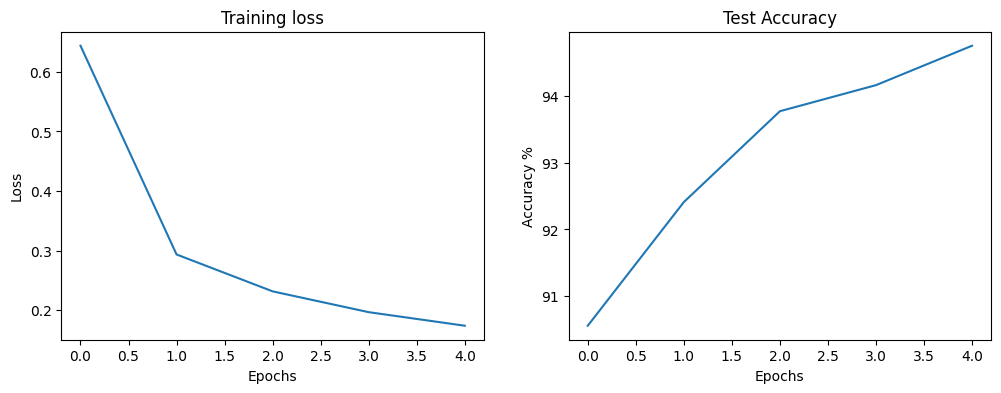

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(train_losses)
ax1.set_title("Training loss")
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.plot(test_accuracies)
ax2.set_title("Test Accuracy")
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy %')